Import the needed files.

In [0]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sys
import torch
!pip install tf-nightly-gpu-2.0-preview
import tensorflow

     |████████████████████████████████| 346.7MB 53kB/s 
     |████████████████████████████████| 3.1MB 9.8MB/s 
     |████████████████████████████████| 61kB 24.7MB/s 
     |████████████████████████████████| 430kB 48.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/89/67/41/63cbf0f6ac0a6156588b9587be4db5565f8c6d8ccef98202fc
Successfully built wrapt
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
  Found existing installation: wrapt 1.10.11
    Uninstalling wrapt-1.10.11:
      Successfully uninstalled wrapt-1.10.11


In [0]:
torch.__version__

'1.1.0'

Colab grants you access to a Nvidia tesla T4

In [0]:
!nvidia-smi

Mon May 13 20:52:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    15W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Thats a good gpu, with no pesky graphics taking up storage either

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
%cd /gdrive/My\ Drive/cs445/

/gdrive/My Drive/cs445


In [0]:
import neuralnetworks_pytorch as nn

In [0]:
ls

body_style.nnet                  IMG_20190512_180319__01.jpg  __pycache__/
final/                           neuralnetworks_pytorch.py    Writeup.gdoc
final_training_body_style.ipynb  ocular-vehicular-patdown/
final_training_decade.ipynb      pickles/


In [0]:
#Xbatch1 = pkl.load(open("./pickles/training_batches/batch0.pkl", "rb"))
#Tbatch1 = pkl.load(open("./pickles/training_batches/batch0_targets.pkl", "rb"))
#Xbatch2 = pkl.load(open("./pickles/training_batches/batch1.pkl", "rb"))
#Tbatch2 = pkl.load(open("./pickles/training_batches/batch1_targets.pkl", "rb"))
#Xbatch3 = pkl.load(open("./pickles/training_batches/batch2.pkl", "rb"))
#Tbatch3 = pkl.load(open("./pickles/training_batches/batch2_targets.pkl", "rb"))
#Xbatch1_test = pkl.load(open("./pickles/test_batches/batch0.pkl", "rb"))
#Tbatch1_test = pkl.load(open("./pickles/test_batches/batch0_targets.pkl", "rb"))

In [0]:
Xbatch = pkl.load(open("./pickles/train_batches1-5/batch0.pkl", "rb"))
Tbatch = pkl.load(open("./pickles/train_batches1-5/batch0_targets.pkl", "rb"))

In [0]:
Xbatch_test = pkl.load(open("./pickles/test_batches1-5/batch0.pkl", "rb"))
Tbatch_test = pkl.load(open("./pickles/test_batches1-5/batch0_targets.pkl", "rb")) 

In [0]:
Xbatch.shape, Xbatch_test.shape

((6515, 55, 110, 3), (1629, 55, 110, 3))

In [0]:
Xbatch.nbytes #118 MB, used to be 450 MB a batch before downsampling

118247250

In [0]:
makes = np.unique(Tbatch[:, 0])
style_names = np.unique(Tbatch[:,1])
years = np.unique(Tbatch[:,2])
years, makes, style_names

(array(['1991', '1993', '1994', '1997', '1998', '1999', '2000', '2001',
        '2002', '2006', '2007', '2008', '2009', '2010', '2011', '2012'],
       dtype='<U54'),
 array(['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
        'Eagle', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo',
        'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar',
        'Jeep', 'Lamborghini', 'Land', 'Lincoln', 'MINI', 'Maybach',
        'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
        'Plymouth', 'Porsche', 'Ram', 'Rolls-Royce', 'Scion', 'Spyker',
        'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'],
       dtype='<U54'),
 array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'SUV', 'Sedan',
        'Truck', 'Van', 'Wagon'], dtype='<U54'))

Make target classes for decade of produciton

In [0]:
for target in Tbatch:
    if int(target[2]) < 2000:
        target[2] = 0
    elif 2000 <= int(target[2]) < 2010:
        target[2] = 1
    else:
        target[2] = 2

In [0]:
for target in Tbatch_test:
    if int(target[2]) < 2000:
        target[2] = 0
    elif 2000 <= int(target[2]) < 2010:
        target[2] = 1
    else:
        target[2] = 2

In [0]:
for target in Tbatch:
    #print(target)
    target[1] = np.where(style_names == target[1])[0][0]

In [0]:
for target in Tbatch_test:
    #print(target)
    target[1] = np.where(style_names == target[1])[0][0]

Here, we can select which of the output classes we wish to train on 

In [0]:
output_class = 1
Ttrain = Tbatch[:, output_class]
Ttest = Tbatch_test[:, output_class]

In [0]:
n_outputs = len(np.unique(Ttrain))
n_outputs

9

Change to the channels first format, which is what is expected by pytorch

In [0]:
Xbatch = np.rollaxis(Xbatch, 3, 1)
Xbatch_test = np.rollaxis(Xbatch_test, 3, 1)

In [0]:
input_size_in_pixels = 3

Image is 55 by 110. For convolution size, we can start with 7x7, then 5x5 down to 3x3

In [0]:
learning_rates = [0.01, 0.001, 0.0001, 0.00005, 0.00001]

In [0]:
input_height = Xbatch.shape[2]
input_width = Xbatch.shape[3]

In [0]:
#n_hiddens_by_layer = [300, 400, 500, 800, 5000, 5000]
n_hiddens_by_layer = [300, 400, 500, 800, 5000, 10000]
batch_size = 200
#learning_rate = 0.00005 #.01 nb, .001 pretty good, .0001 great
n_iterations = 20
n_conv_layers = 4

window = [7, 5, 3, 3]
stride = [2, 2, 2, 2]

relu = True
gpu = True

In [0]:
def percent_correct(actual, predicted):
    return 100 * np.mean(actual == predicted)

In [0]:
results = []
for learning_rate in learning_rates:
    nnet = nn.NeuralNetworkClassifier_Pytorch(input_size_in_pixels, 
                                          n_hiddens_by_layer, 
                                          n_outputs, 
                                          relu,gpu, 
                                          n_conv_layers, window, stride, input_height, input_width)
    nnet.train(Xbatch, Ttrain.astype(np.uint8), Xbatch_test, Ttest.astype(np.uint8), n_iterations, batch_size, learning_rate)
    classes, _, _ = nnet.use(Xbatch_test)
    percent = percent_correct(Ttest.astype(np.uint8), classes)
    results.append((percent, learning_rate))

NeuralNetworkClassifier_Pytorch created on cuda
Iteration 2, cost = 1.9792, acc = 24.98
Iteration 4, cost = 1.9415, acc = 25.41
Iteration 6, cost = 1.9707, acc = 25.84
Iteration 8, cost = 1.9390, acc = 25.48
Iteration 10, cost = 1.9303, acc = 25.66
Iteration 12, cost = 1.9364, acc = 25.60
Iteration 14, cost = 1.9563, acc = 25.72
Iteration 16, cost = 1.9389, acc = 25.72
Iteration 18, cost = 1.9294, acc = 25.84
Iteration 20, cost = 1.9234, acc = 25.66
NeuralNetworkClassifier_Pytorch created on cuda
Iteration 2, cost = 1.9843, acc = 24.98
Iteration 4, cost = 1.9372, acc = 28.97
Iteration 6, cost = 1.8016, acc = 34.25
Iteration 8, cost = 1.6476, acc = 37.20
Iteration 10, cost = 1.4886, acc = 38.92
Iteration 12, cost = 1.3298, acc = 38.80
Iteration 14, cost = 1.2610, acc = 36.89
Iteration 16, cost = 1.0644, acc = 37.94
Iteration 18, cost = 0.8705, acc = 38.18
Iteration 20, cost = 0.7642, acc = 40.21
NeuralNetworkClassifier_Pytorch created on cuda
Iteration 2, cost = 1.7920, acc = 35.36
Iter

In [0]:
results

[(25.659914057704114, 0.01),
 (40.208717004297114, 0.001),
 (45.73357888275015, 0.0001),
 (46.96132596685083, 5e-05),
 (45.73357888275015, 1e-05)]

In [0]:
percents = [res[0] for res in results]
rhos = [res[1] for res in results]

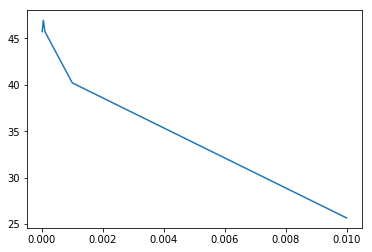

In [0]:
import matplotlib.pyplot as plt
plt.plot(rhos, percents)

Based on the graph above, the best learning rate is .00005. We'll train a network of that learning rate. 

In [0]:
#n_hiddens_by_layer = [300, 400, 500, 800, 5000, 5000]
n_hiddens_by_layer = [300, 400, 500, 800, 5000, 10000]
batch_size = 200
learning_rate = 0.00005 #.01 nb, .001 pretty good, .0001 great
n_iterations = 20
n_conv_layers = 4

window = [7, 5, 3, 3]
stride = [2, 2, 2, 2]

relu = True
gpu = True

In [0]:
nnet = nn.NeuralNetworkClassifier_Pytorch(input_size_in_pixels, 
                                          n_hiddens_by_layer, 
                                          n_outputs, 
                                          relu,gpu, 
                                          n_conv_layers, window, stride, input_height, input_width)

NeuralNetworkClassifier_Pytorch created on cuda


In [0]:
nnet.train(Xbatch, Ttrain.astype(np.uint8), Xbatch_test, Ttest.astype(np.uint8), n_iterations, batch_size, learning_rate)

Iteration 2, cost = 1.7586, acc = 36.89
Iteration 4, cost = 1.3962, acc = 38.74
Iteration 6, cost = 0.9828, acc = 41.87
Iteration 8, cost = 0.5398, acc = 43.89
Iteration 10, cost = 0.3217, acc = 38.00
Iteration 12, cost = 0.1072, acc = 45.37
Iteration 14, cost = 0.0133, acc = 46.41
Iteration 16, cost = 0.0041, acc = 47.02
Iteration 18, cost = 0.0013, acc = 46.90
Iteration 20, cost = 0.0018, acc = 46.29


In [0]:
!git clone https://github.com/chrishaynes21/ocular-vehicular-patdown.git

fatal: destination path 'ocular-vehicular-patdown' already exists and is not an empty directory.


In [0]:
nnet = nnet.to(torch.device('cpu'))
nnet.device = 'cpu'
pkl.dump(nnet, open("body_style.nnet", "wb"))

In [0]:
%cd ocular-vehicular-patdown/app/server/

/gdrive/My Drive/cs445/ocular-vehicular-patdown/app/server


In [0]:
from image_processing import image_to_numpy

In [0]:
% cd /gdrive/My\ Drive/cs445/

/gdrive/My Drive/cs445


In [0]:
ls

final/                           IMG_20190512_180319__01.jpg  pickles/
final_training_body_style.ipynb  neuralnetworks_pytorch.py    __pycache__/
final_training_decade.ipynb      ocular-vehicular-patdown/


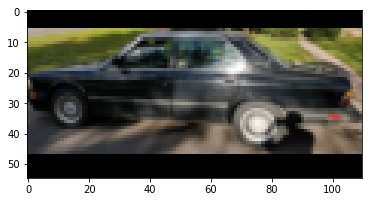

In [0]:
bens_test_car = image_to_numpy("IMG_20190512_180319__01.jpg", 55, 110)
plt.imshow(bens_test_car)

In [0]:
bens_test_car = np.rollaxis(bens_test_car, -1, 0)
bens_test_car = np.expand_dims(bens_test_car, axis = 0)
bens_test_car.shape

(1, 3, 55, 110)

In [0]:
nnet.use(bens_test_car)

(array([5]),
 array([[1.3326278e-03, 5.9987081e-04, 1.4974232e-04, 7.4433337e-05,
         4.2210540e-05, 9.1041946e-01, 6.8613581e-02, 2.6202065e-06,
         1.8765451e-02]], dtype=float32),
 array([[ 0.6054862 , -0.19270754, -1.5805058 , -2.279518  , -2.846752  ,
          7.132239  ,  4.546824  , -5.6261687 ,  3.250351  ]],
       dtype=float32))

In [0]:
style_names[5]

'Sedan'